In [1]:
#!/usr/bin/python
import os, sys

from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO
import re
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
file = open("airports-extended.dat.txt","r")



In [2]:

def powerlaw(x,a,b,c):
    return a*x**b+c

def f5(x,a,b,c,d,g,h):
    return a*x**5+b*x**4+c*x**3+d*x**2+g*x+h

def f3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d


def VowelToConsRatio(name):
    
    words = sum(c.isalpha() for c in name)
    spaces = sum(c.isspace() for c in name)
    others = len(name) - words - spaces
    vowels = sum(map(name.lower().count, "aeiou"))
    consonents = words - vowels


    return float(vowels)/float(consonents), float(spaces)/float(consonents), float(others)/float(consonents)



def MergeCount(totalCount, thisCount):
    totalCount2=totalCount+thisCount
    return totalCount2



def LatLongClassMaker(coor):
    lat,long=coor
    if lat<30:
        if long>-90:
            return 1 #florida
        elif long < -120:
            return 2 #hawaii
        else:
            return 3 #texas
    elif lat >50:
        return 4 #alaska
    elif long> -80 and lat < 40:
        return 5 #south east
    elif long> -80 and lat >40:
        return 6 #new england
    elif long< -80:
        return int((50-lat)/20.*5)*int((125+long)/45.*9)+7
    else:
        return 0
    #worst mapping ever-- ignores new england and city diversity
    return 0
ratio=[]
coords=[]



In [3]:

for line in file:
    line=re.split(',',line);

    if line[3] == "\"United States\"":
        thisratioV, thisratioS, thisratioO=VowelToConsRatio(line[1]);
        ratio.append([thisratioV,thisratioS,thisratioO])
        coords.append([float(line[6]),float(line[7])])


ratioarray=np.empty([len(ratio),3])
coordsarray=np.empty([len(coords),2])
regionarray=np.empty([len(coords)])

for i, rat in enumerate(ratio):
    ratioarray[i,:]=rat
for i,coor in enumerate(coords):
    coordsarray[i,:]=coor
#    outputcoor=LatLongClassMaker(coor)
#    regionarray[i]=outputcoor




In [4]:
testphrases=["Ufda!", "I just dont know about that", "Howdy, pardner", "Where are we?", "I thank whatever gods may be for my unconquerable soul.", "I welcome our new robot overlords", "l33t h4k3rs", "I know you I walked with you once upon a dream", "These stories dont mean anything if you have no one to tell them to", "Baby you have the sort of hands that rip me apart","Multi-messenger astronomy", "Rainbow flag", "I prefer They or He?", "numerical relativity", "LIGO", "scalar field", "Osculating Orbits", "Monte-Carlo Simulation", "Data Analysis", "Data Science", "Parallelization", "Paralyzation", "Partial disability", "Non-epileptic seizures", "Wednesday Lunch", "Tuesday Lunch", "Thursday Lunch", "Guild Wars", "Elvenar", "Good Apple"]


colleaguephrases=["general relativity", "black hole", "loop quantum gravity",  "quantization", "space-time", "Hamiltonian constraint", "Ashtekar", "LiSA", "LIGO", "group", "white hole", "scalar field", "numerical relativity", "cosmology", "diffeomorphism", "continuum limit", "David Berger", "Reisner-Nordstrom", "black hole spacetime", "initial data", "interpretation of quantum mechanics"]



In [5]:
xphrases=[]
for phrase in testphrases:
    print(phrase)
    vtc, stc, otc = VowelToConsRatio(phrase)
    xphrases.append([vtc,stc,otc])
xcolleague=[]
for phrase in colleaguephrases:
    print(phrase)
    vtc, stc, otc = VowelToConsRatio(phrase)
    xcolleague.append([vtc,stc,otc])

print(xphrases)




Ufda!
I just dont know about that
Howdy, pardner
Where are we?
I thank whatever gods may be for my unconquerable soul.
I welcome our new robot overlords
l33t h4k3rs
I know you I walked with you once upon a dream
These stories dont mean anything if you have no one to tell them to
Baby you have the sort of hands that rip me apart
Multi-messenger astronomy
Rainbow flag
I prefer They or He?
numerical relativity
LIGO
scalar field
Osculating Orbits
Monte-Carlo Simulation
Data Analysis
Data Science
Parallelization
Paralyzation
Partial disability
Non-epileptic seizures
Wednesday Lunch
Tuesday Lunch
Thursday Lunch
Guild Wars
Elvenar
Good Apple
general relativity
black hole
loop quantum gravity
quantization
space-time
Hamiltonian constraint
Ashtekar
LiSA
LIGO
group
white hole
scalar field
numerical relativity
cosmology
diffeomorphism
continuum limit
David Berger
Reisner-Nordstrom
black hole spacetime
initial data
interpretation of quantum mechanics
[[1.0, 0.0, 0.5], [0.5714285714285714, 0.357142

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(ratioarray,coordsarray,test_size=0.33,shuffle=False, random_state=False)

scaler = StandardScaler()
xtrain2=scaler.fit_transform(xtrain)
xtest2=scaler.fit_transform(xtest)
xphrases2=scaler.fit_transform(xphrases)
xcolleague2=scaler.fit_transform(xcolleague)





In [30]:
trainshp=np.shape(ytrain)
testshp=np.shape(ytest)
trainshp[0]

1536

In [40]:
ytrain_flat = ytrain.flatten()
ytest_flat=ytest.flatten()

In [39]:
np.shape(ytrain_flat)

(3072,)

In [43]:


clf=SVR(C=3.0, coef0=0.0, degree=3, kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=True)
clf.fit(xtrain2, ytrain.reshape(ytrain_flat)
latlongpred=clf.predict(xtrain2)
latlong=pred.reshape([np.shape(ytrain)])






SyntaxError: invalid syntax (<ipython-input-43-0ff9082bf1e6>, line 5)

In [20]:
print(clf.score(xtest,ytest_flat)


-0.12734413902254915
-0.6996848676167473


In [10]:
predlongitude

array([39.73828502, 40.32247205, 40.02763475, ..., 40.32405628,
       40.3635107 , 40.10553074])

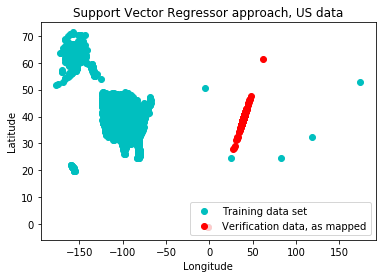

In [21]:
plt.figure()
plt.title("Support Vector Regressor approach, US data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(ytrain[:,1], ytrain[:,0], c='c', label="Training data set")
plt.scatter(predlongitude,predlatitude,c='r', label="Verification data, as mapped")
#plt.scatter(phraselongpred,phraselatpred,c='b',label="My test phrases, I live in Minnesota right now")
#plt.scatter(phraselongcolleague, phraselatcolleague, c='y', label="Colleagues test phrases, he lives in Louisiana right now")
#plt.scatter(phraselongpred[0],phraselatpred[1],c='b',label=testphrases[0])
#plt.scatter(phraselongpred[1],phraselatpred[1],c='m',label=testphrases[1])
#plt.scatter(phraselongpred[2],phraselatpred[1],c='c',label=testphrases[2])
#plt.scatter(phraselongpred[3],phraselatpred[1],c='g',label=testphrases[3])
#plt.scatter(phraselongpred[4],phraselatpred[1],c='y',label=testphrases[4])
#plt.scatter(phraselongpred[5],phraselatpred[1],c='y',label=testphrases[5])
#plt.scatter(phraselongpred[6],phraselatpred[1],c='y',label=testphrases[6])
#plt.scatter(phraselongpred[7],phraselatpred[1],c='y',label=testphrases[7])
#plt.scatter(phraselongpred[8],phraselatpred[1],c='y',label=testphrases[8])
#plt.scatter(phraselongpred[9],phraselatpred[1],c='y',label=testphrases[9])
#plt.scatter(phraselongpred[10],phraselatpred[1],c='y',label=testphrases[10])
#plt.scatter(phraselongpred[11],phraselatpred[1],c='y',label=testphrases[11])
plt.legend(loc="lower right")
plt.show()







